In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_df = pd.read_csv("data/mouse_drug_data.csv")
trial_df = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, trial_df, how='outer', on='Mouse ID')

#Create lists of times, drugs, and colors
timepoints = combined_df['Timepoint'].unique().tolist()
drug_list = combined_df['Drug'].unique()
drug_list.sort()
colors = ['firebrick', 'sandybrown', 'gold', 'olivedrab', 'chartreuse', 'lightseagreen', 'deepskyblue', 'navy',
         'darkorchid', 'brown']

In [2]:
#Tick values
time_ticks = np.arange(0,46,5)
size_ticks = np.arange(35,76,5)
site_ticks = np.arange(0,4.1,.5)
mice_ticks = np.arange(5,26,5)

## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = combined_df.groupby(['Drug', 'Timepoint'])
grouped_mean = grouped_df.mean()

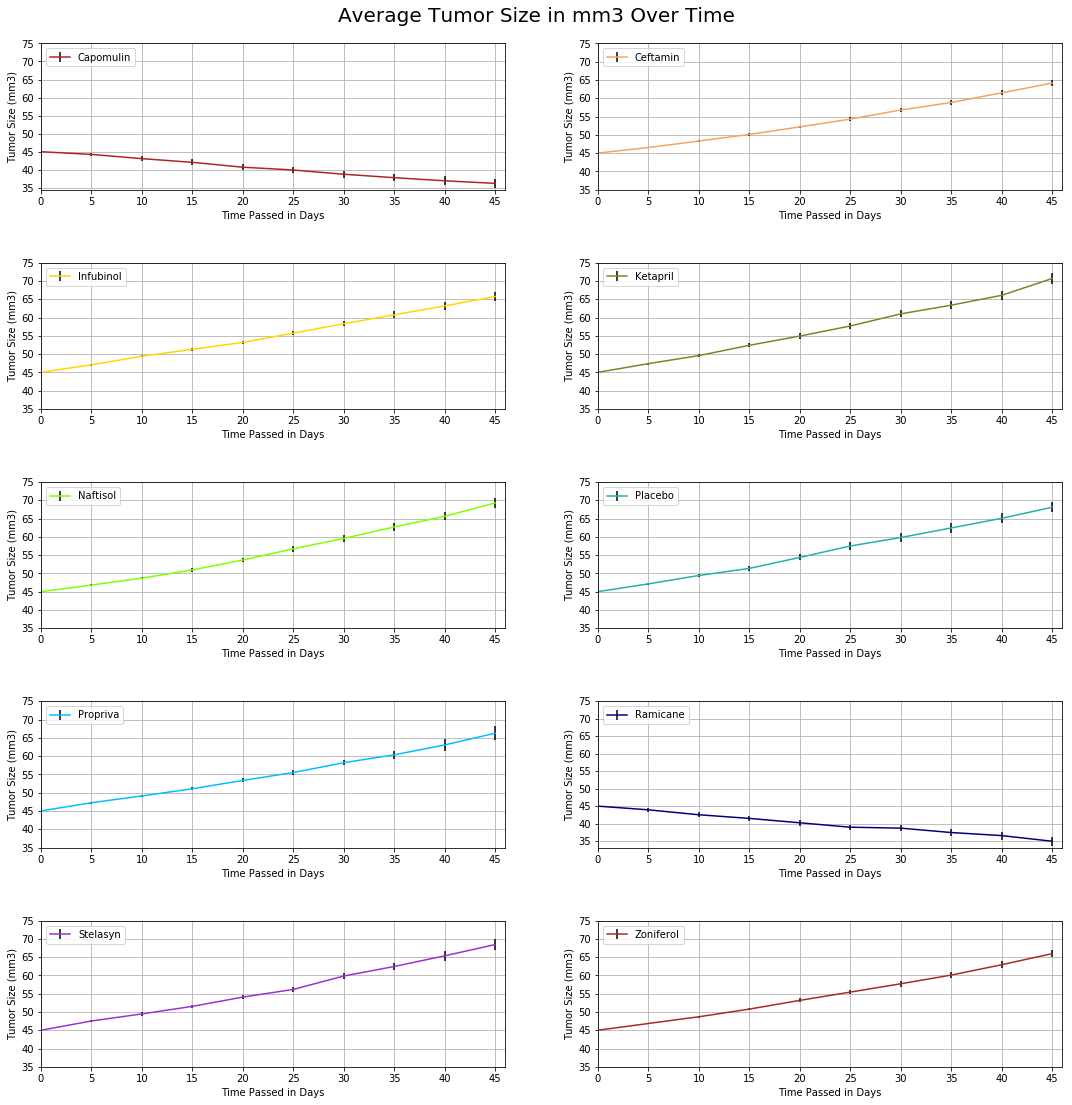

In [4]:
size_values = []
size_std_errors = []
fig = plt.figure(figsize=(45,45))
fig.suptitle('Average Tumor Size in mm3 Over Time', x=.5, y=1.02, fontsize=20)

#Loop through grouped mean dataframe by drug name and add tumor size values to list
for name in drug_list:
    
    info = grouped_mean['Tumor Volume (mm3)'].xs(name, level='Drug').tolist()
    size_values.append(info)
    
#Loop through combined_df by drug name and time
for name in drug_list:
    
    size_list = [] #reset list for each drug
    
    for time in timepoints:
        
        #Add tumor size values for current drug and timepoint to list and calculate standard error
        se_samples = combined_df['Tumor Volume (mm3)'].loc[(combined_df['Drug'] == name) & 
                                                           (combined_df['Timepoint'] == time)].tolist()
        se = sem(se_samples)
        
        #Add standard error to list
        size_list.append(se)
        
    #Adds standard error list for all time points for currently selected drug
    size_std_errors.append(size_list)

#Plot subplots
for count in range(1, len(size_values) + 1):

    fig.add_subplot(5,2,count)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    plt.errorbar(timepoints, size_values[count - 1], yerr=size_std_errors[count-1], label= drug_list[count-1],
                 color=colors[count - 1], ecolor='black', elinewidth=1.5)
    plt.grid()
    plt.legend(loc=2)
    plt.xlabel(f'Time Passed in Days')
    plt.xticks(time_ticks)
    plt.yticks(size_ticks)     #standardize y axis for comparison
    plt.xlim(0,46)
    plt.ylabel('Tumor Size (mm3)')
    
plt.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.2)
fig.savefig('Graphs/Average Tumor Size Over Time by Drug')

In [1]:
fig_a = plt.figure()
fig_a.set_figheight(10)
fig_a.set_figwidth(15)

for count in range(1, len(size_values) + 1):
    
    plt.errorbar(timepoints, size_values[count - 1], label= drug_list[count-1],
                 color=colors[count - 1], marker='x')
plt.grid()
plt.legend()
plt.xlabel('Time Passed in Days', fontsize=14)
plt.xticks(time_ticks)
plt.ylabel('Tumor Size (mm3)', fontsize=14)
plt.title('Tumor Size in mm3 Over Time', fontsize=20, y=1.04)
plt.xlim(0,45)
plt.tight_layout()

fig_a.savefig('Graphs/Tumor Size Over Time Grouped')

NameError: name 'plt' is not defined

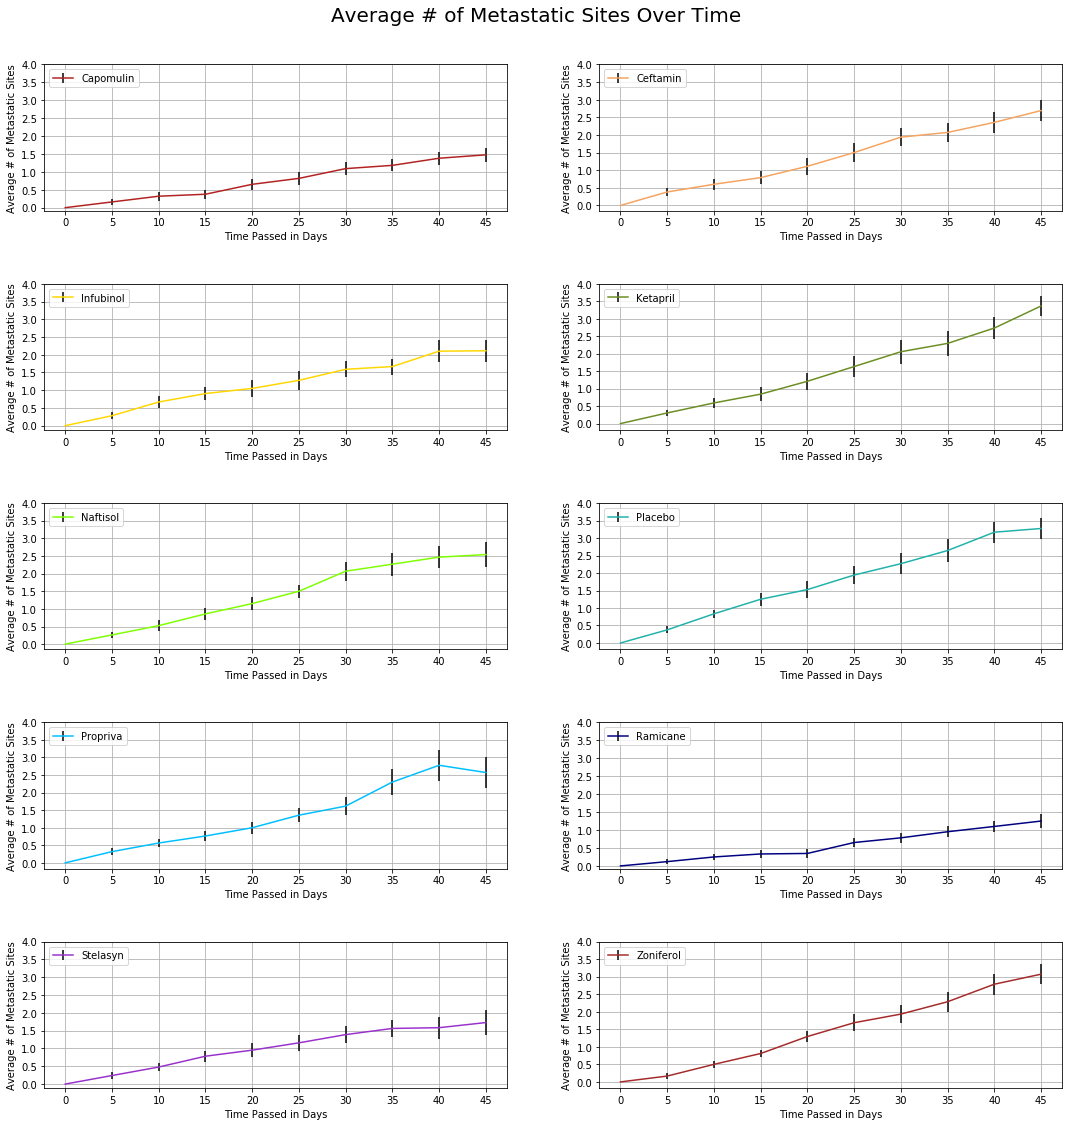

In [6]:
meta_values = []
meta_std_errors = []
fig2 = plt.figure()
fig2.suptitle('Average # of Metastatic Sites Over Time', x=.5, y=1.04, fontsize=20)
for name in drug_list:
    
    info = grouped_mean['Metastatic Sites'].xs(name, level='Drug').tolist()
    meta_values.append(info)
    
for name in drug_list:
    
    meta_list = []
    for time in timepoints:
    
        se_samples = combined_df['Metastatic Sites'].loc[(combined_df['Drug'] == name) & 
                                                           (combined_df['Timepoint'] == time)].tolist()
        se = sem(se_samples)
        meta_list.append(se)    
    
    meta_std_errors.append(meta_list)

for count in range(1, len(meta_values) + 1):

    fig2.add_subplot(5,2,count)
    fig2.set_figheight(15)
    fig2.set_figwidth(15)
    plt.errorbar(timepoints, meta_values[count - 1], yerr=meta_std_errors[count-1], label= drug_list[count-1],
                 color=colors[count - 1], ecolor='black', elinewidth=1.5)
    plt.grid()
    plt.legend(loc=2)
    plt.xlabel(f'Time Passed in Days')
    plt.ylabel('Average # of Metastatic Sites')
    plt.xticks(time_ticks)
    plt.yticks(site_ticks)
    
plt.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.2)

fig2.savefig('Graphs/Average Metastatic Sites by Drug')

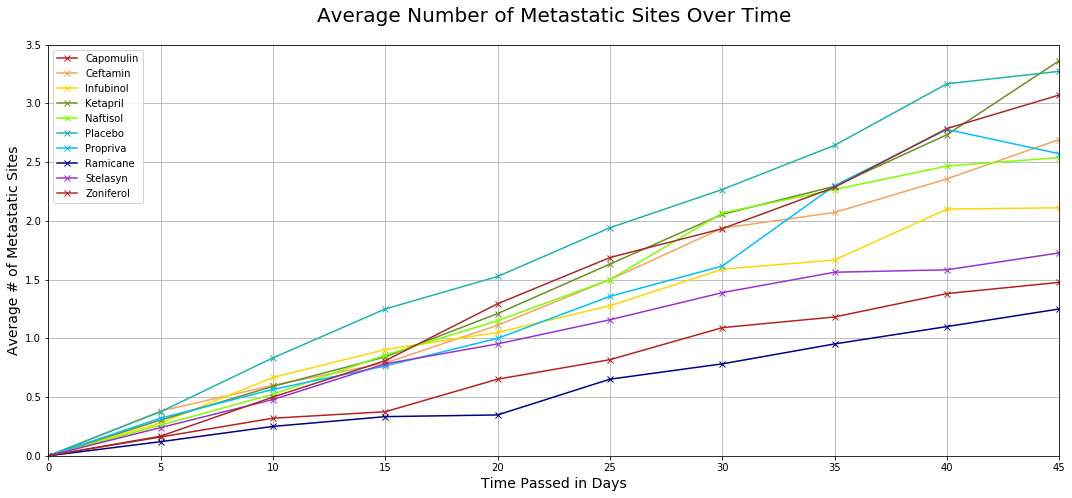

In [7]:
fig2_a = plt.figure()


for count in range(1, len(size_values) + 1):
    plt.errorbar(timepoints, meta_values[count - 1], label= drug_list[count-1], color=colors[count - 1], marker='x')

plt.grid()
plt.legend()
plt.xlabel('Time Passed in Days', fontsize=14)
plt.ylabel('Average # of Metastatic Sites', fontsize=14)
plt.xticks(time_ticks)
plt.yticks(site_ticks)
plt.xlim(0,45)
plt.ylim(0, 3.5)
plt.title('Average Number of Metastatic Sites Over Time', fontsize=20, y=1.04)
fig2_a.set_figheight(7)
fig2_a.set_figwidth(15)
plt.tight_layout()

fig2_a.savefig('Graphs/Average Metastatic Sites Grouped')

In [8]:
mice_count_all = []

for name in drug_list:
    
    mice_count = []
    
    for time in timepoints:
        
        mice = len(combined_df['Mouse ID'].loc[(combined_df['Drug'] == name) & (combined_df['Timepoint'] == time)].unique())
        
        mice_count.append(mice)
        
    mice_count_all.append(mice_count)

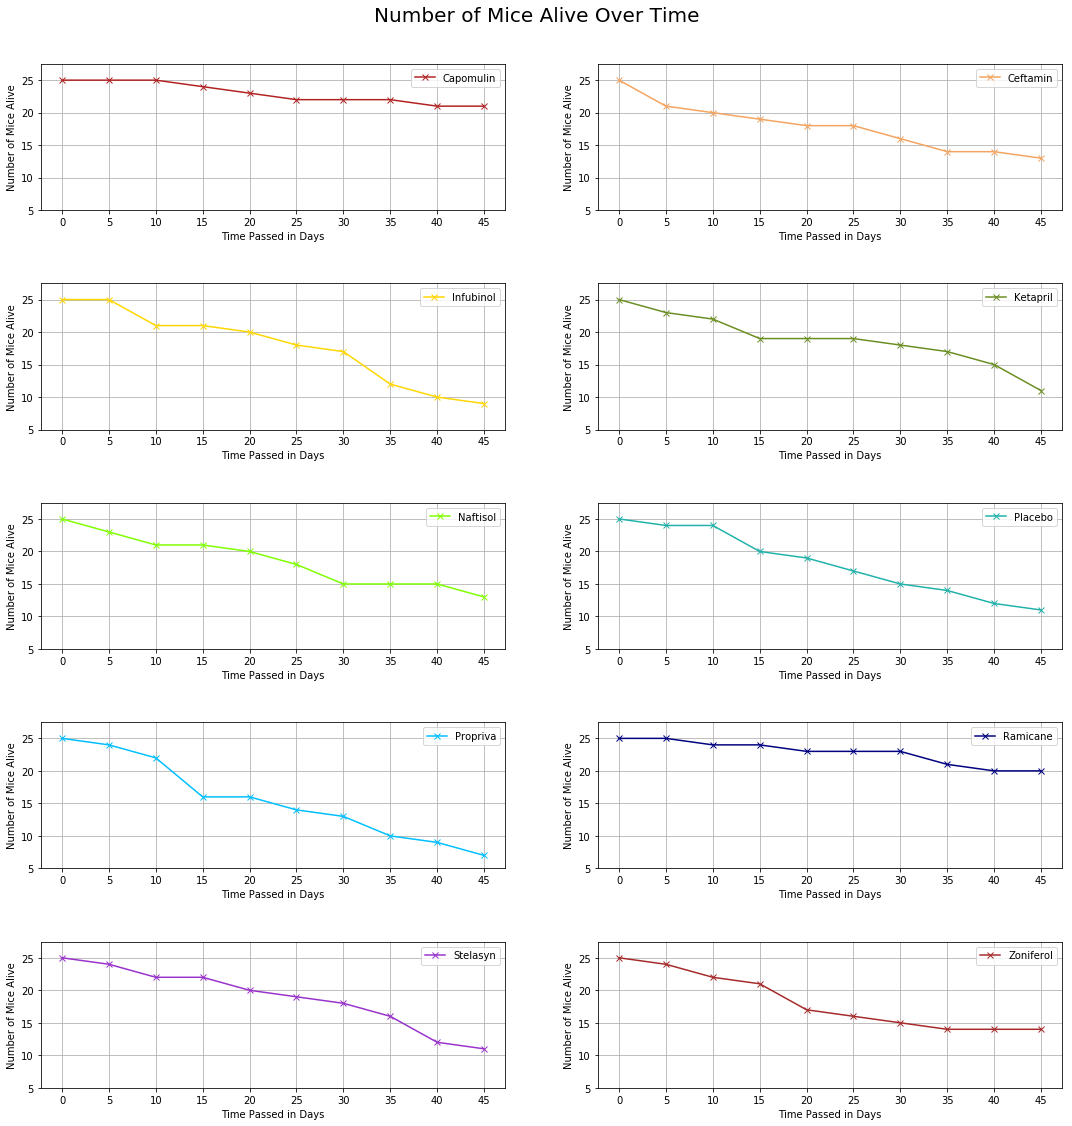

In [9]:
fig_3 = plt.figure()
fig_3.suptitle('Number of Mice Alive Over Time', x=.5, y=1.04, fontsize=20)
for count in range(1, len(drug_list) + 1):
    
    fig_3.add_subplot(5,2,count)
    fig_3.set_figheight(15)
    fig_3.set_figwidth(15)
    plt.errorbar(timepoints, mice_count_all[count-1], marker='x', label= drug_list[count-1], color= colors[count - 1])
    plt.xticks(timepoints)
    plt.yticks(mice_ticks)
    plt.xlabel('Time Passed in Days')
    plt.ylabel('Number of Mice Alive')
    plt.ylim(5,27.5)
    plt.grid()
    plt.legend()

    
plt.tight_layout()
plt.subplots_adjust(hspace=.5, wspace=.2)
fig_3.savefig('Graphs/Number of Mice Alive Over Time by Drug')

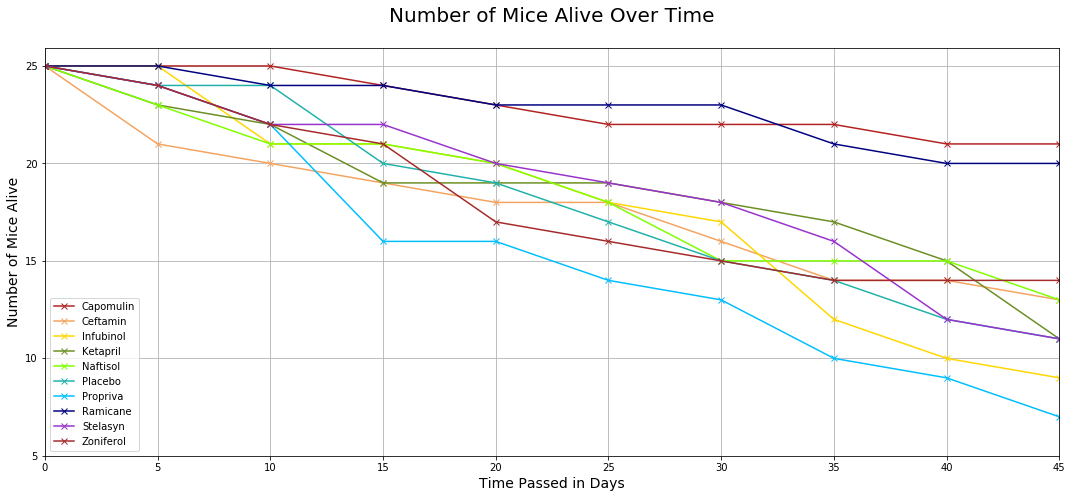

In [10]:
fig3_a = plt.figure()

for x in range(0, len(drug_list)):
    
    plt.errorbar(timepoints, mice_count_all[x], marker='x', label= drug_list[x], color= colors[x])
    
    
plt.grid()
plt.legend()
plt.xlabel('Time Passed in Days', fontsize=14)
plt.ylabel('Number of Mice Alive', fontsize=14)
plt.title('Number of Mice Alive Over Time', fontsize=20, y=1.05)
plt.xlim(0,45)
plt.xticks(time_ticks)
plt.yticks(mice_ticks)
fig3_a.set_figheight(7)
fig3_a.set_figwidth(15)
plt.tight_layout()

fig3_a.savefig('Graphs/Number of Mice Alive Grouped')

In [11]:
tumor_change = []

for name in drug_list:
    
    size = []
    size = grouped_mean['Tumor Volume (mm3)'].xs(name, level='Drug').tolist()
    
    change = round(((size[-1] / size[0]) - 1) * 100, 2)
    
    tumor_change.append(change)

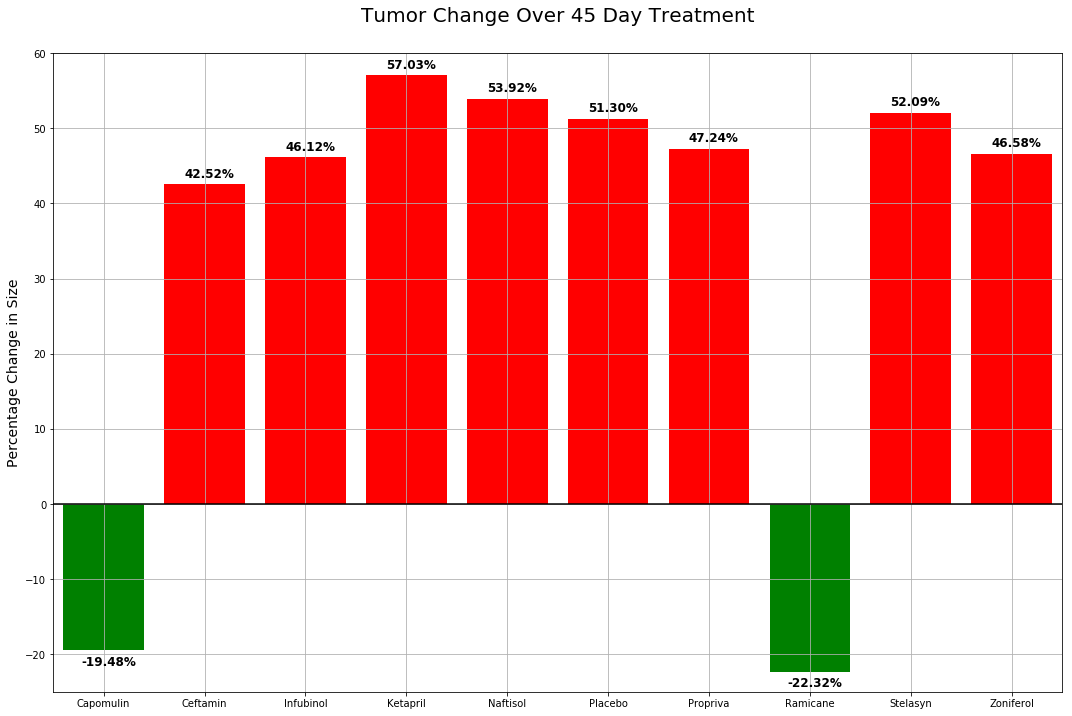

In [12]:
fig4 = plt.figure()
bar_ticks = np.arange(len(drug_list))

for x in range(0, len(drug_list)):
    
    if tumor_change[x] > 0:
    
        plt.bar(x, tumor_change[x], color='red')
        plt.annotate('%.2f%%' % tumor_change[x], (x - .2,tumor_change[x] + 1), fontsize=12, fontweight='bold')
        
    else:
        
        plt.bar(x, tumor_change[x], color='green')
        plt.annotate('%.2f%%' % tumor_change[x], (x - .22,tumor_change[x] - 2), fontsize=12, fontweight='bold')
        
        
plt.xticks(bar_ticks, drug_list)
fig4.set_figheight(10)
fig4.set_figwidth(15)
plt.hlines(0,-1,len(drug_list))
plt.title('Tumor Change Over 45 Day Treatment', fontsize=20, y=1.04)
plt.ylabel('Percentage Change in Size', fontsize=14)
plt.xlim(-.5,9.5)
plt.ylim(-25,60)
plt.grid()
plt.tight_layout()

fig4.savefig('Graphs/Tumor Change Over Treatment')

In [13]:
#Observations:

#Capomulin and Ramicane were the only drugs to reduce tumor size

#They also had the lowest # of metastatic sites and the most amount of mice alive at the end of the trial

#The rest of the drugs are grouped pretty close around the placebo group in each of the graphs
#which might indicate they have no effect on tumors